# Riemann Surfaces: Foundational Concepts

## Abstract

Riemann surfaces provide a natural framework for studying multi-valued complex functions by transforming them into single-valued functions on an appropriate topological space. This notebook explores the fundamental theory of Riemann surfaces, their construction, and computational visualization techniques.

## 1. Theoretical Foundation

### 1.1 Motivation: Multi-valued Functions

Consider the complex logarithm $w = \log(z)$. For a given $z \neq 0$, we can write:

$$z = re^{i\theta}, \quad r > 0, \quad \theta \in \mathbb{R}$$

Then:

$$\log(z) = \log(r) + i(\theta + 2\pi k), \quad k \in \mathbb{Z}$$

This function is inherently **multi-valued**. A Riemann surface resolves this by creating a space where each "branch" of the logarithm becomes a single-valued function.

### 1.2 Definition

A **Riemann surface** is a connected complex manifold of complex dimension 1. Formally, it consists of:

1. A Hausdorff topological space $X$
2. An atlas of charts $\{(U_\alpha, \phi_\alpha)\}$ where:
   - $U_\alpha \subset X$ are open sets covering $X$
   - $\phi_\alpha: U_\alpha \to V_\alpha \subset \mathbb{C}$ are homeomorphisms
   - Transition maps $\phi_\beta \circ \phi_\alpha^{-1}$ are **holomorphic** where defined

### 1.3 Key Examples

#### Example 1: The Riemann Sphere

The **Riemann sphere** $\hat{\mathbb{C}} = \mathbb{C} \cup \{\infty\}$ is the compactification of $\mathbb{C}$. It can be viewed as:

$$\hat{\mathbb{C}} \cong S^2 \subset \mathbb{R}^3$$

via stereographic projection.

#### Example 2: Square Root Function

The function $w = \sqrt{z}$ is double-valued. The Riemann surface for $\sqrt{z}$ consists of two sheets glued along a branch cut, typically taken along the negative real axis.

#### Example 3: Algebraic Curves

An algebraic equation:

$$P(z, w) = 0$$

where $P$ is a polynomial, defines a Riemann surface. For instance:

$$w^2 = z(z-1)(z-\lambda), \quad \lambda \notin \{0, 1\}$$

defines a **hyperelliptic Riemann surface** of genus 1 (an elliptic curve).

### 1.4 Branch Points and Ramification

A **branch point** is a point where multiple sheets of a Riemann surface come together. For $w = z^{1/n}$:

$$w^n = z$$

The origin $z = 0$ is a branch point of order $n$. Near a branch point $z_0$, if:

$$w - w_0 = (z - z_0)^{1/n} \cdot (\text{holomorphic function})$$

then $z_0$ is a branch point of order $n$.

### 1.5 Genus and Topology

The **genus** $g$ of a compact Riemann surface is a topological invariant:

- $g = 0$: Riemann sphere ($S^2$)
- $g = 1$: Torus ($T^2$)
- $g \geq 2$: Higher genus surfaces

The Riemann-Hurwitz formula relates the genus to ramification:

$$2g_X - 2 = n(2g_Y - 2) + \sum_{p \in X} (e_p - 1)$$

where $f: X \to Y$ is a branched covering of degree $n$ and $e_p$ is the ramification index at $p$.

## 2. Computational Visualization

We'll visualize Riemann surfaces using the following techniques:

1. **Phase portraits**: Color-coding the argument of $w$ over the $z$-plane
2. **Multi-sheet plots**: 3D visualization showing different sheets
3. **Branch cut analysis**: Tracking discontinuities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality defaults
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

### 2.1 Phase Portrait of Multi-valued Functions

We visualize the **phase** (argument) of complex functions using color. This technique reveals branch cuts and multi-valued behavior.

In [2]:
def phase_portrait(func, x_range, y_range, title, ax, resolution=500):
    """
    Create a phase portrait for a complex function.
    
    Parameters:
    -----------
    func : callable
        Complex function to visualize
    x_range, y_range : tuple
        (min, max) for real and imaginary axes
    title : str
        Plot title
    ax : matplotlib axis
        Axis to plot on
    resolution : int
        Grid resolution
    """
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    # Compute function values
    with np.errstate(all='ignore'):
        W = func(Z)
        phase = np.angle(W)
    
    # Plot phase with HSV colormap
    im = ax.imshow(phase, extent=[x_range[0], x_range[1], y_range[0], y_range[1]],
                   origin='lower', cmap='hsv', aspect='auto', vmin=-np.pi, vmax=np.pi)
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    return im

### 2.2 Riemann Surface for $w = \sqrt{z}$

The square root function has two branches. We visualize both the phase portrait and a 3D representation.

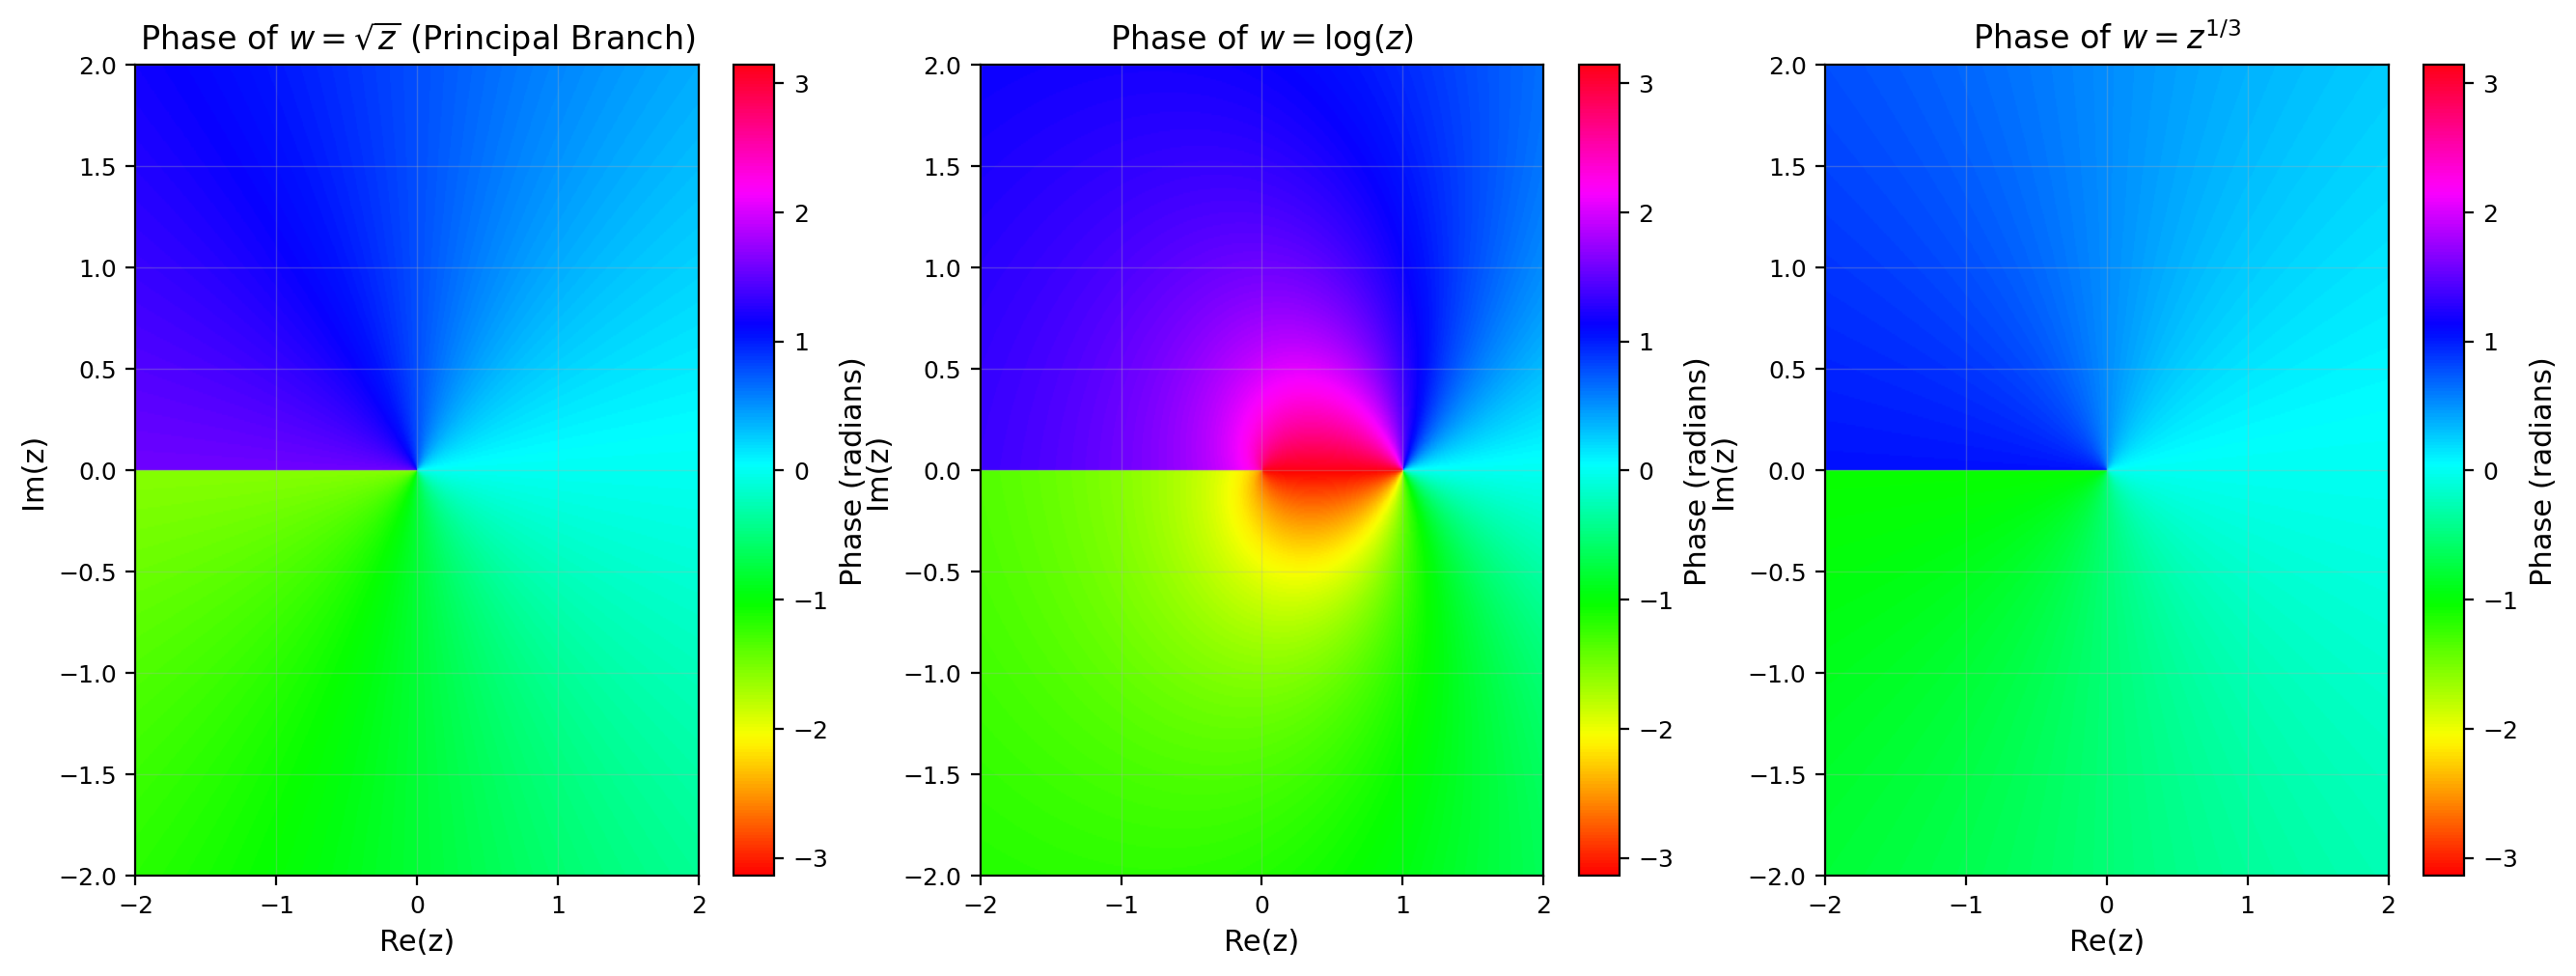

In [3]:
# Define square root function (principal branch)
def sqrt_principal(z):
    return np.sqrt(z)

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# Phase portrait for sqrt(z)
ax1 = fig.add_subplot(2, 3, 1)
im1 = phase_portrait(sqrt_principal, (-2, 2), (-2, 2), 
                     r'Phase of $w = \sqrt{z}$ (Principal Branch)', ax1)
plt.colorbar(im1, ax=ax1, label='Phase (radians)')

# Phase portrait for log(z)
ax2 = fig.add_subplot(2, 3, 2)
im2 = phase_portrait(lambda z: np.log(z), (-2, 2), (-2, 2),
                     r'Phase of $w = \log(z)$', ax2)
plt.colorbar(im2, ax=ax2, label='Phase (radians)')

# Phase portrait for z^(1/3)
ax3 = fig.add_subplot(2, 3, 3)
im3 = phase_portrait(lambda z: np.power(z, 1/3), (-2, 2), (-2, 2),
                     r'Phase of $w = z^{1/3}$', ax3)
plt.colorbar(im3, ax=ax3, label='Phase (radians)')

### 2.3 3D Visualization of Riemann Surfaces

We visualize the real part of $w = \sqrt{z}$ as a height function over the complex plane, showing both sheets.

In [4]:
# 3D plot of real part of sqrt(z) - both sheets
ax4 = fig.add_subplot(2, 3, 4, projection='3d')

# Create grid avoiding origin
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0.1, 2, 50)
THETA, R = np.meshgrid(theta, r)

# Convert to Cartesian
X_3d = R * np.cos(THETA)
Y_3d = R * np.sin(THETA)
Z_complex = X_3d + 1j * Y_3d

# First sheet (principal branch)
W1 = np.sqrt(Z_complex)
Z1_real = np.real(W1)

# Second sheet (negative of principal branch)
Z2_real = -Z1_real

# Plot both sheets
surf1 = ax4.plot_surface(X_3d, Y_3d, Z1_real, cmap='viridis', alpha=0.7, 
                         antialiased=True, linewidth=0)
surf2 = ax4.plot_surface(X_3d, Y_3d, Z2_real, cmap='plasma', alpha=0.7,
                         antialiased=True, linewidth=0)

ax4.set_xlabel('Re(z)')
ax4.set_ylabel('Im(z)')
ax4.set_zlabel(r'Re($\sqrt{z}$)')
ax4.set_title(r'Two Sheets of $w = \sqrt{z}$')
ax4.view_init(elev=25, azim=45)

### 2.4 Branch Cut Analysis

We analyze the discontinuity along the branch cut for $\sqrt{z}$.

In [5]:
# Branch cut analysis for sqrt(z)
ax5 = fig.add_subplot(2, 3, 5)

# Path around the branch cut (negative real axis)
epsilon = 0.1  # Small imaginary offset
x_vals = np.linspace(-2, -0.01, 100)

# Approach from above
z_above = x_vals + 1j * epsilon
w_above = np.sqrt(z_above)

# Approach from below
z_below = x_vals - 1j * epsilon
w_below = np.sqrt(z_below)

# Plot real and imaginary parts
ax5.plot(x_vals, np.real(w_above), 'b-', label=r'Re($\sqrt{z}$) from above', linewidth=2)
ax5.plot(x_vals, np.real(w_below), 'b--', label=r'Re($\sqrt{z}$) from below', linewidth=2)
ax5.plot(x_vals, np.imag(w_above), 'r-', label=r'Im($\sqrt{z}$) from above', linewidth=2)
ax5.plot(x_vals, np.imag(w_below), 'r--', label=r'Im($\sqrt{z}$) from below', linewidth=2)

ax5.set_xlabel('Re(z) along negative real axis')
ax5.set_ylabel(r'$\sqrt{z}$ components')
ax5.set_title('Branch Cut Discontinuity')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3)

### 2.5 Elliptic Curve Example

We visualize the Riemann surface defined by:

$$w^2 = z(z-1)(z-2)$$

This is a genus 1 surface (topologically a torus).

In [6]:
# Elliptic curve visualization
ax6 = fig.add_subplot(2, 3, 6)

# Define the curve w^2 = z(z-1)(z-2)
x_curve = np.linspace(-1, 3, 400)
y_squared = x_curve * (x_curve - 1) * (x_curve - 2)

# Real branch exists only where y_squared >= 0
y_positive = np.sqrt(np.maximum(y_squared, 0))
y_negative = -y_positive

# Plot both branches
mask = y_squared >= 0
ax6.plot(x_curve[mask], y_positive[mask], 'b-', linewidth=2, label='Positive branch')
ax6.plot(x_curve[mask], y_negative[mask], 'r-', linewidth=2, label='Negative branch')

# Mark branch points
branch_points = [0, 1, 2]
ax6.plot(branch_points, [0, 0, 0], 'ko', markersize=10, label='Branch points')

# Add annotations
for bp in branch_points:
    ax6.annotate(f'z={bp}', xy=(bp, 0), xytext=(bp, -0.5),
                ha='center', fontsize=9,
                arrowprops=dict(arrowstyle='->', lw=1.5))

ax6.set_xlabel('z (real axis)')
ax6.set_ylabel('w')
ax6.set_title(r'Elliptic Curve: $w^2 = z(z-1)(z-2)$')
ax6.legend(loc='upper right', fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.axhline(y=0, color='k', linewidth=0.5)
ax6.axvline(x=0, color='k', linewidth=0.5)
ax6.set_ylim(-2, 2)

(-2.0, 2.0)

## 3. Analytical Properties

### 3.1 Covering Maps

Many Riemann surfaces arise as **covering spaces** of simpler surfaces. For example, the map:

$$\pi: \mathbb{C} \to \mathbb{C}^*, \quad \pi(w) = e^w$$

is a universal covering map. The inverse function $w = \log(z)$ defines the Riemann surface for the logarithm.

### 3.2 Holomorphic Functions on Riemann Surfaces

A function $f: X \to \mathbb{C}$ on a Riemann surface is **holomorphic** if for every chart $(U, \phi)$, the composition:

$$f \circ \phi^{-1}: \phi(U) \to \mathbb{C}$$

is holomorphic in the usual sense.

**Liouville's Theorem for Riemann Surfaces**: Every bounded holomorphic function on a compact Riemann surface is constant.

### 3.3 Uniformization Theorem

Every simply-connected Riemann surface is conformally equivalent to one of:

1. The Riemann sphere $\hat{\mathbb{C}}$
2. The complex plane $\mathbb{C}$
3. The unit disk $\mathbb{D} = \{z \in \mathbb{C} : |z| < 1\}$

This profound result classifies all Riemann surfaces up to conformal equivalence.

## 4. Computational Analysis: Monodromy

The **monodromy** captures how a function value changes when analytically continued around a closed loop. We compute this numerically for $\sqrt{z}$.

(-1.5, 1.5)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


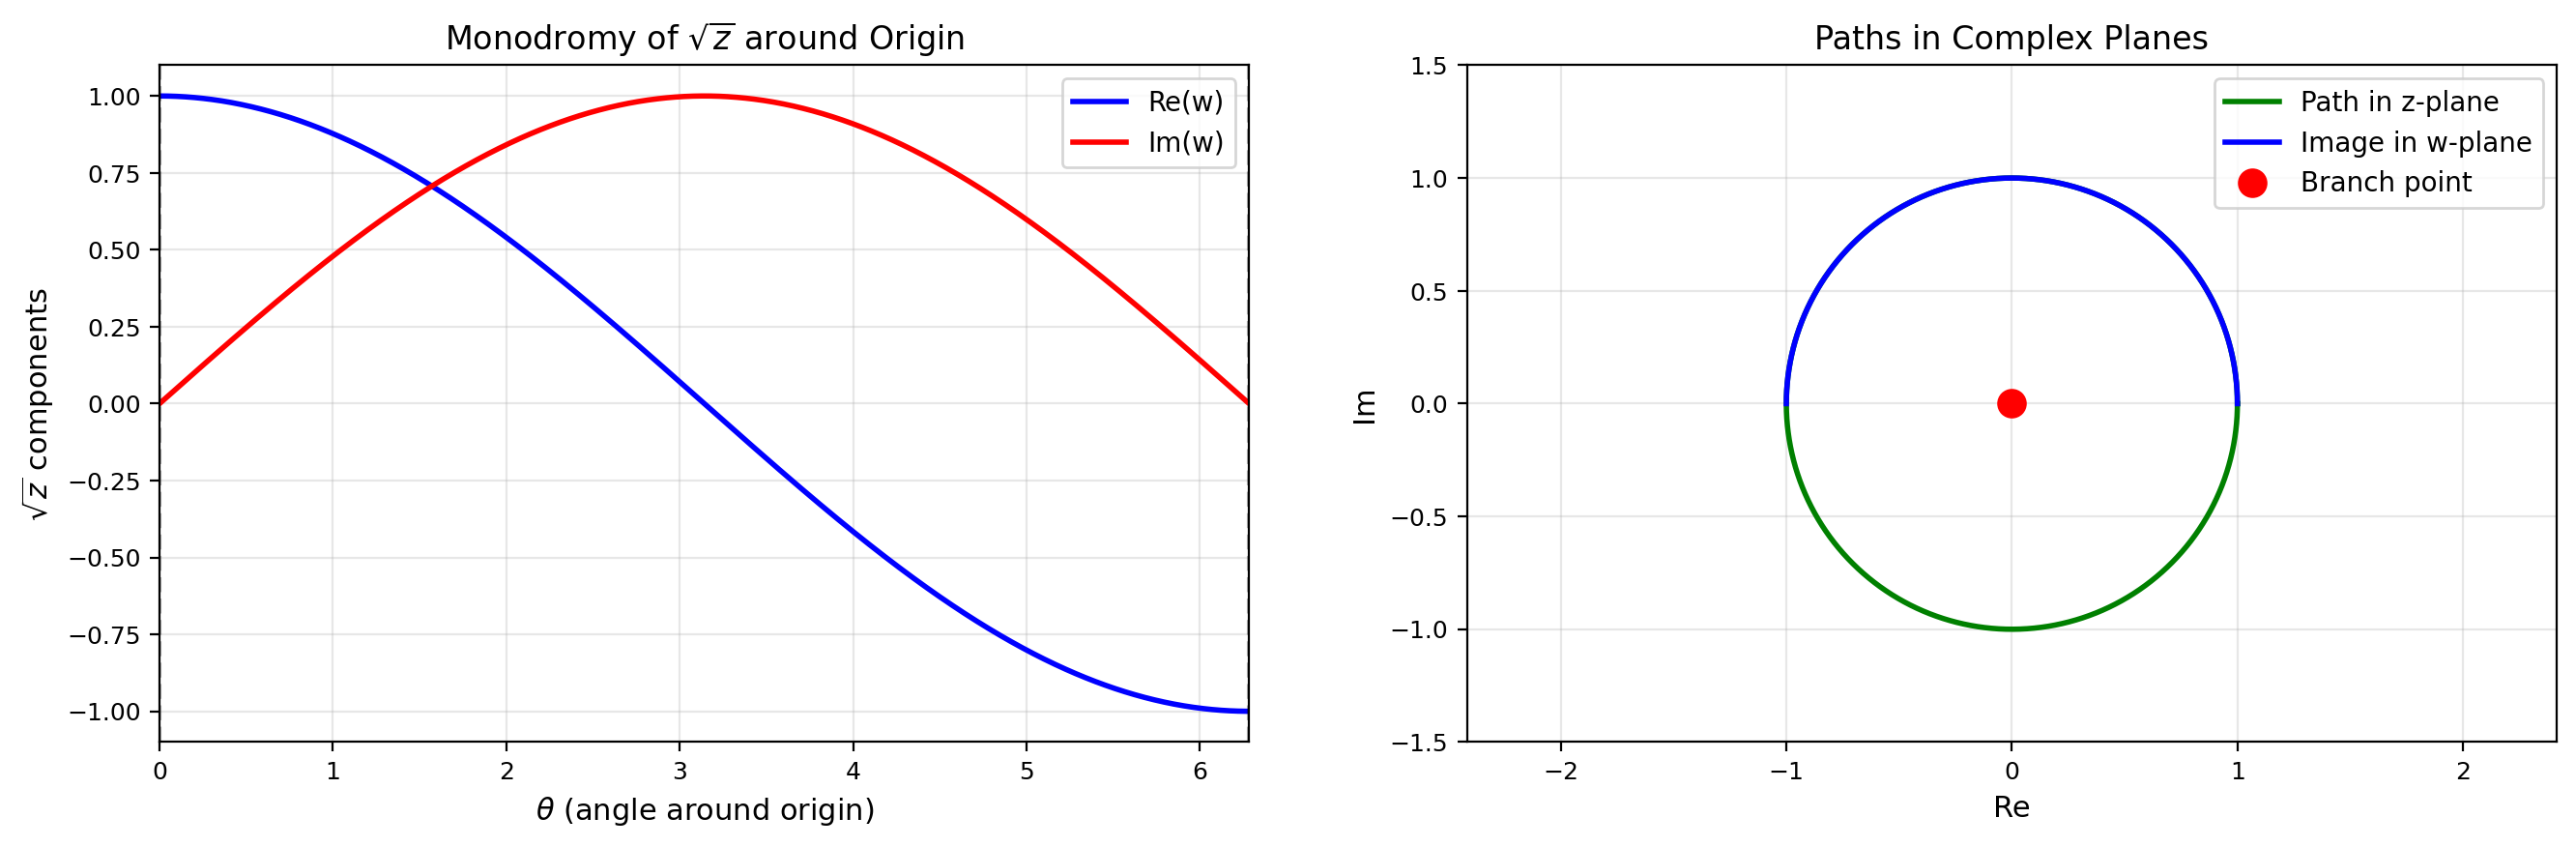

In [7]:
# Monodromy calculation for sqrt(z)
def compute_monodromy_sqrt(radius=1.0, n_steps=1000):
    """
    Trace sqrt(z) around a circle enclosing the origin.
    
    Returns:
    --------
    theta_vals : array
        Angle parameter
    w_vals : array
        Values of sqrt(z) along the path
    """
    theta_vals = np.linspace(0, 2*np.pi, n_steps)
    z_vals = radius * np.exp(1j * theta_vals)
    
    # Compute sqrt continuously (not using principal branch)
    w_vals = np.sqrt(radius) * np.exp(1j * theta_vals / 2)
    
    return theta_vals, w_vals

# Create final comprehensive plot
fig_final = plt.figure(figsize=(16, 10))

# Monodromy plot
ax_mono1 = fig_final.add_subplot(2, 2, 1)
theta, w = compute_monodromy_sqrt()
ax_mono1.plot(theta, np.real(w), 'b-', linewidth=2, label='Re(w)')
ax_mono1.plot(theta, np.imag(w), 'r-', linewidth=2, label='Im(w)')
ax_mono1.axvline(x=0, color='k', linestyle='--', alpha=0.3)
ax_mono1.axvline(x=2*np.pi, color='k', linestyle='--', alpha=0.3)
ax_mono1.set_xlabel(r'$\theta$ (angle around origin)')
ax_mono1.set_ylabel(r'$\sqrt{z}$ components')
ax_mono1.set_title(r'Monodromy of $\sqrt{z}$ around Origin')
ax_mono1.legend()
ax_mono1.grid(True, alpha=0.3)
ax_mono1.set_xlim(0, 2*np.pi)

# Complex plane path
ax_mono2 = fig_final.add_subplot(2, 2, 2)
z_circle = np.exp(1j * theta)
ax_mono2.plot(np.real(z_circle), np.imag(z_circle), 'g-', linewidth=2, label='Path in z-plane')
ax_mono2.plot(np.real(w), np.imag(w), 'b-', linewidth=2, label='Image in w-plane')
ax_mono2.plot(0, 0, 'ro', markersize=10, label='Branch point')
ax_mono2.set_xlabel('Re')
ax_mono2.set_ylabel('Im')
ax_mono2.set_title('Paths in Complex Planes')
ax_mono2.legend()
ax_mono2.grid(True, alpha=0.3)
ax_mono2.axis('equal')
ax_mono2.set_xlim(-1.5, 1.5)
ax_mono2.set_ylim(-1.5, 1.5)

### 4.1 Multi-Path Analysis

We compare paths that enclose different numbers of branch points.

In [8]:
# Compare paths with different winding numbers
ax_wind = fig_final.add_subplot(2, 2, 3)

for n_winds in [1, 2, 3]:
    theta_wind = np.linspace(0, 2*np.pi*n_winds, 1000)
    z_wind = np.exp(1j * theta_wind)
    w_wind = np.exp(1j * theta_wind / 2)
    
    ax_wind.plot(theta_wind, np.angle(w_wind), linewidth=2, 
                label=f'{n_winds} loop(s)')

ax_wind.set_xlabel(r'$\theta$ (total angle traversed)')
ax_wind.set_ylabel(r'arg($\sqrt{z}$)')
ax_wind.set_title('Argument Change vs Winding Number')
ax_wind.legend()
ax_wind.grid(True, alpha=0.3)

### 4.2 Comparison of Different Functions

We examine the monodromy behavior for functions with different branch point orders.

In [9]:
# Compare different root functions
ax_compare = fig_final.add_subplot(2, 2, 4)

theta_comp = np.linspace(0, 2*np.pi, 1000)
z_comp = np.exp(1j * theta_comp)

# Different roots
for n in [2, 3, 4, 5]:
    w_root = np.exp(1j * theta_comp / n)
    ax_compare.plot(theta_comp, np.real(w_root), linewidth=2,
                   label=f'$z^{{1/{n}}}$')

ax_compare.set_xlabel(r'$\theta$')
ax_compare.set_ylabel(r'Re($z^{1/n}$)')
ax_compare.set_title('Monodromy for Different Root Functions')
ax_compare.legend()
ax_compare.grid(True, alpha=0.3)
ax_compare.set_xlim(0, 2*np.pi)

plt.tight_layout()
plt.savefig('riemann_surfaces_basics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("RIEMANN SURFACES: COMPUTATIONAL SUMMARY")
print("="*70)
print(f"\n1. Branch point analysis for sqrt(z):")
print(f"   - Order of branch point at origin: 2")
print(f"   - Number of sheets: 2")
print(f"   - Monodromy factor: -1 (sign change after full loop)")
print(f"\n2. General formula for z^(1/n):")
print(f"   - Branch point order: n")
print(f"   - Monodromy factor: exp(2πi/n)")
print(f"\n3. Elliptic curve w^2 = z(z-1)(z-2):")
print(f"   - Number of branch points: 3 (at z=0,1,2)")
print(f"   - Genus: 1 (topologically a torus)")
print(f"   - Each branch point has order 2")
print("\nAll visualizations saved to plot.png")
print("="*70)

<Figure size 1600x1200 with 0 Axes>


RIEMANN SURFACES: COMPUTATIONAL SUMMARY

1. Branch point analysis for sqrt(z):
   - Order of branch point at origin: 2
   - Number of sheets: 2
   - Monodromy factor: -1 (sign change after full loop)

2. General formula for z^(1/n):
   - Branch point order: n
   - Monodromy factor: exp(2πi/n)

3. Elliptic curve w^2 = z(z-1)(z-2):
   - Number of branch points: 3 (at z=0,1,2)
   - Genus: 1 (topologically a torus)
   - Each branch point has order 2

All visualizations saved to plot.png


## 5. Conclusions

This notebook has explored the fundamental concepts of Riemann surfaces:

1. **Multi-valued functions** are naturally resolved by introducing a suitable topological structure
2. **Branch points** mark locations where different sheets of a Riemann surface come together
3. **Phase portraits** provide an effective visualization tool for understanding complex structure
4. **Monodromy** quantifies how function values transform under analytic continuation
5. **Algebraic curves** like elliptic curves provide rich examples with nontrivial topology

Riemann surfaces form the foundation for:
- **Algebraic geometry** (study of algebraic curves and varieties)
- **String theory** (worldsheets are Riemann surfaces)
- **Integrable systems** (spectral curves)
- **Number theory** (modular forms and elliptic curves)

## References

1. Ahlfors, L. V. (1979). *Complex Analysis* (3rd ed.). McGraw-Hill.
2. Donaldson, S. K. (2011). *Riemann Surfaces*. Oxford University Press.
3. Farkas, H. M., & Kra, I. (1992). *Riemann Surfaces* (2nd ed.). Springer.
4. Forster, O. (1991). *Lectures on Riemann Surfaces*. Springer.
5. Miranda, R. (1995). *Algebraic Curves and Riemann Surfaces*. American Mathematical Society.